# Дискретные случайные величины и распределения

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import display
from tabulate import tabulate

In [2]:
x = np.arange(0, 7)

rng_prob = np.random.default_rng(2)
cum_probs = rng_prob.uniform(low=0, high=1, size=len(x)-1).round(3)
cum_probs = np.append(arr=cum_probs, values=[0,1])
probs = np.diff(np.sort(cum_probs))

distr_law = np.array([x, probs])

print('Рассмотрим случайную величину с таблицей распределения')
display(tabulate(distr_law, tablefmt='html', showindex=['x', 'f(x)']))

Рассмотрим случайную величину с таблицей распределения


x,0,1,2,3,4,5,6
f(x),0.092,0.17,0.036,0.302,0.129,0.085,0.186


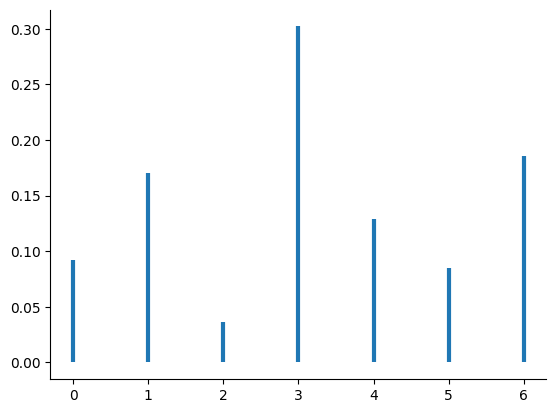

In [3]:
fig, ax =  plt.subplots(1,1)

ax.vlines(x, 0, probs, linestyle='-', lw=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

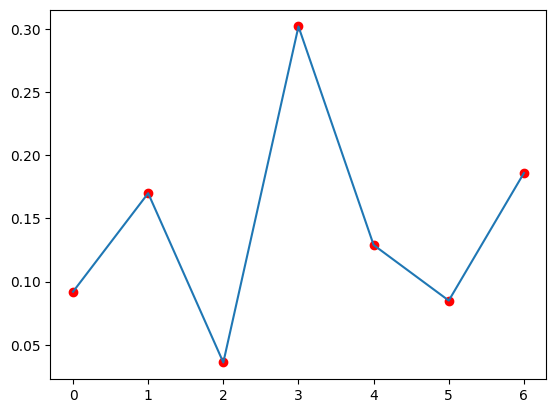

In [4]:
plt.plot(x, probs)
plt.scatter(x, probs, c='r')
plt.show()

## Вычисление вероятностей событий

Вычислим вероятности 

$$
\begin{aligned}
	&P(X<3) & &P(X\geq3) & &P(1\leq X<4) 
\end{aligned}
$$

In [5]:
probs[ x<3 ].sum(), probs[ x>=3 ].sum(), probs[ (x>=1) & (x<4) ].sum()

(np.float64(0.298), np.float64(0.7020000000000001), np.float64(0.508))

## Функция распределения

$$
\begin{aligned}
	F(t)&=P(X\leq t) & t&\in\mathbb{R}
\end{aligned}
$$

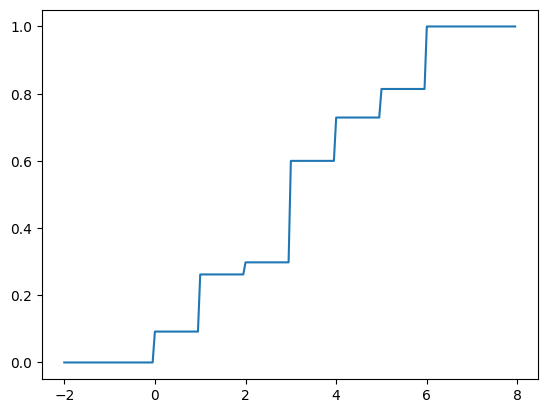

In [6]:
t = np.arange(x.min()-2, x.max()+2, 0.05)
cdf = np.array([])

for z in t:
	if z<x.min():
		cdf = np.append(cdf, 0)
	else:
		cdf = np.append(cdf, probs[ x<=z ].sum())

plt.plot(t, cdf)
plt.show()

## Математическое ожидание, дисперсия, стандартное отклонение, мода

Математическое ожидание

$$
	E(X)=\sum_x xf(x)
$$

In [7]:
np.sum(x*probs)

np.float64(3.205)

Момент второго порядка

$$
	E(X^2)=\sum_x x^2f(x)
$$

In [8]:
np.sum((x**2)*probs)

np.float64(13.917000000000002)

Дисперсия (центральный момент второго порядка)

$$
	Var(X)=E(X^2)-(E(X))^2
$$

In [9]:
np.sum((x**2)*probs)-(np.sum(x*probs))**2

np.float64(3.6449750000000005)

Стандартное отклонение

$$
	\sigma(X)=\sqrt{Var(X)}
$$

In [10]:
np.sqrt(np.sum((x**2)*probs)-(np.sum(x*probs))**2)

np.float64(1.909181761907441)

Мода

$$
	\argmax_x f(x)
$$

In [11]:
x[np.argmax(probs)]

np.int64(3)